In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import nltk

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

from nltk import word_tokenize

from langdetect import detect_langs

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer #for other languages

import time 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
pd.set_option('display.max_rows', 15)

# Performing Sentiment Analysis in Python

Let us begin by importing a dataset and getting some basic information about it. We will start with a dataset consisting of movie reviews and a 'label' of whether the sentiment of the review is positive '1' or negative '0'.

In [5]:
data = pd.read_csv("IMDB_sample.csv", index_col=[0])

In [6]:
data.head()

,review,label
18245,This short spoof can be found on Elite's Mille...,0
19801,A singularly unfunny musical comedy that artif...,0
3222,"An excellent series, masterfully acted and dir...",1
6010,The master of movie spectacle Cecil B. De Mill...,1
16355,I was gifted with this movie as it had such a ...,0


In [7]:
data.label.value_counts()

0    3782
1    3719
Name: label, dtype: int64

We can also present the reviews as a percentage

In [8]:
data.label.value_counts() / len(data)

0    0.504199
1    0.495801
Name: label, dtype: float64

We can also check the length of the reviews.

In [9]:
length_reviews = data.review.str.len()

In [10]:
length_reviews.sort_values(ascending = False)

49       10321
5917      9420
16031     8754
9682      8180
13043     7382
         ...  
12520      106
6408        70
14807       64
16479       53
13568       52
Name: review, Length: 7501, dtype: int64

In [11]:
type(length_reviews)

pandas.core.series.Series

In [12]:
data.label.value_counts() 

0    3782
1    3719
Name: label, dtype: int64

In [13]:
print("The shortest review is: " + str(min(length_reviews)) + " characters long")
print("The longest review is: " + str(max(length_reviews)) + " characters long")

The shortest review is: 52 characters long
The longest review is: 10321 characters long


We go on my using the TextBlob function and using the 'sentiment' parameter.

In [14]:
text = "Today was a good day!"
text2 = "Today was an exceptional day!"
text3 = "Today was an exceptonal day!"

In [15]:
my_valance = TextBlob(text)
my_valance2 = TextBlob(text2)
my_valance3 = TextBlob(text3)

In [16]:
print(my_valance.sentiment)
print(my_valance2.sentiment)
print(my_valance3.sentiment)

Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.8333333333333333, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)


Let us now build a simple word cloud.

In [17]:
two_cities = "It was the best of times, it was the worst of times, it was the age of wisdom, \
it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, \
it was the season of Light, it was the season of Darkness, it was the spring of hope, \
it was the winter of despair, we had everything before us, we had nothing before us, \
we were all going direct to Heaven, we were all going direct the other way – in short, \
the period was so far like the present period, that some of its noisiest authorities \
insisted on its being received, for good or for evil, in the superlative degree of comparison only."

In [18]:
cloud_two_cities = WordCloud().generate(two_cities)

In [19]:
type(cloud_two_cities)

wordcloud.wordcloud.WordCloud

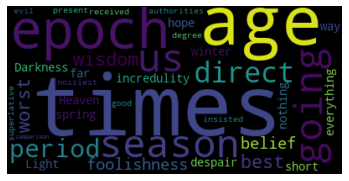

In [20]:
plt.imshow(cloud_two_cities, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [21]:
east_of_eden = "It was the best of times, it was the worst of times, it was the age of wisdom, \
it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, \
it was the season of Light, it was the season of Darkness, it was the spring of hope, \
it was the winter of despair, we had everything before us, we had nothing before us, \
we were all going direct to Heaven, we were all going direct the other way – in short, \
the period was so far like the present period, that some of its noisiest authorities insisted on its being received, \
for good or for evil, in the superlative degree of comparison only."

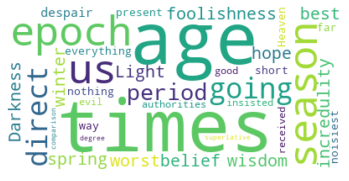

In [22]:
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)
plt.imshow(cloud_east_of_eden, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [23]:
illuminated = "I am not sad, he would repeat to himself over and over, I am not sad. \
As if he might one day convince himself or convince others -- the only thing worse than \
being sad is for others to know that you are sad. I am not sad."

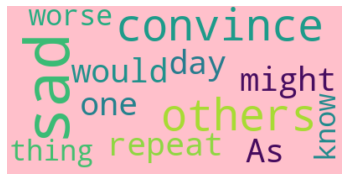

In [24]:
my_stopwords = set(stopwords.words("english"))

cloud_iluminated = WordCloud(background_color="pink", stopwords = my_stopwords).generate(illuminated)
plt.imshow(cloud_iluminated, interpolation = "bilinear")
plt.axis("off")
plt.show()

We will now build a bag-of-words (BOW) using a count vectorizer function.

In [25]:
data = pd.read_csv("amazon_reviews_sample.csv", index_col = [0])

In [26]:
data.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [27]:
vect = CountVectorizer(max_features = 1000)
vect.fit(data.review)
X = vect.transform(data.review)

In [28]:
type(X)

scipy.sparse.csr.csr_matrix

In [29]:
X

<10000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 406668 stored elements in Compressed Sparse Row format>

In [30]:
#transform to an array
my_array = X.toarray()

In [31]:
#transform back to a dataframe and assign column names
X_df = pd.DataFrame(my_array, columns = vect.get_feature_names())

In [32]:
X_df

,10,100,12,15,1984,20,30,40,451,50,...,wrong,wrote,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Using n-grams

In [33]:
amazon_data = pd.read_csv("amazon_reviews_sample.csv", index_col = [0])

In [34]:
amazon_data.shape

(10000, 2)

In [35]:

amazon_data = amazon_data[:100]

In [36]:
amazon_data.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [37]:
vect = CountVectorizer(ngram_range = (1, 2), max_features = 1000, max_df = 200, min_df = 50)

In [38]:
vect.fit(amazon_data["review"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=200, max_features=1000, min_df=50,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [39]:
X_review = vect.transform(amazon_data["review"])

In [40]:
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())

In [41]:
X_df.head()

,and,for,in,is,it,of,the,this,to
0,2,1,1,0,5,2,5,1,2
1,3,2,1,5,1,1,5,5,5
2,4,1,1,2,3,6,11,3,2
3,9,0,0,1,1,8,4,3,0
4,3,0,0,2,4,1,9,1,0


#### Building new features from text

In [42]:
GoT = "Never forget what you are, for surely the world will not. Make it your strength. \
Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you."

In [43]:
got_tokenized = word_tokenize(GoT)

In [44]:
got_tokenized[:10]

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world']

In [45]:
avengers = ["Cause if we can't protect the Earth, you can be d*** sure we'll avenge it",
 'There was an idea to bring together a group of remarkable people, to see if we could become something more',
 "These guys come from legend, Captain. They're basically Gods."]

In [46]:
tokens_avengers = [word_tokenize(item) for item in avengers]

In [47]:
print(tokens_avengers)

[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd***', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


In [48]:
range(len(got_tokenized))

range(0, 41)

In [49]:
len_tokens = []

for token in range(len(got_tokenized)):
    len_tokens.append(len(got_tokenized[token]))

In [50]:
len_tokens[:5]

[5, 6, 4, 3, 3]

#### Detecting the language

In [51]:
foreign = "Algo no esta funcionado!!!!! \
EAFIFAMOBILE compré divisa, recibi los 50 de oro pero luego me aparecio esto !!!! ""Nuevo en:00"" ? \
Eso que significa ?? No soy el unico usuario con este problemas. Estamos gastando dinero en algo que no esta \
funcionado como deberia !!!!"

In [52]:
detect_langs(foreign)

[es:0.9999962053295671]

In [53]:
amazon_data.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [54]:
languages = []

for review in range(len(amazon_data)):
    languages.append(detect_langs(amazon_data.iloc[review, 1]))

In [55]:
print(type(languages))

<class 'list'>


In [56]:
str(languages[0]).split(":")[0][1:]

'en'

In [57]:
languages_cleaned = []

for row in languages:
    language = str(row).split(":")[0][1:]
    languages_cleaned.append(language)

In [58]:
amazon_data["lang"] = languages_cleaned

In [59]:
amazon_data.head()

,score,review,lang
0,1,Stuning even for the non-gamer: This sound tr...,en
1,1,The best soundtrack ever to anything.: I'm re...,en
2,1,Amazing!: This soundtrack is my favorite musi...,en
3,1,Excellent Soundtrack: I truly like this sound...,en
4,1,"Remember, Pull Your Jaw Off The Floor After H...",en


#### Stop words

In [60]:
nltk_stopwords = set(stopwords.words("english"))

In [61]:
wordcloud_stopwords = set(STOPWORDS)

In [62]:
nltk_stopwords - wordcloud_stopwords

{'ain',
 'aren',
 'couldn',
 'd',
 'didn',
 'doesn',
 'don',
 'hadn',
 'hasn',
 'haven',
 'isn',
 'll',
 'm',
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 'needn',
 "needn't",
 'now',
 'o',
 're',
 's',
 'shan',
 "should've",
 'shouldn',
 't',
 "that'll",
 've',
 'wasn',
 'weren',
 'will',
 'won',
 'wouldn',
 'y'}

In [63]:
wordcloud_stopwords - nltk_stopwords

{'also',
 "can't",
 'cannot',
 'com',
 'could',
 'else',
 'ever',
 'get',
 "he'd",
 "he'll",
 "he's",
 'hence',
 "here's",
 "how's",
 'however',
 'http',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'k',
 "let's",
 'like',
 'otherwise',
 'ought',
 'r',
 'shall',
 "she'd",
 "she'll",
 'since',
 "that's",
 "there's",
 'therefore',
 "they'd",
 "they'll",
 "they're",
 "they've",
 "we'd",
 "we'll",
 "we're",
 "we've",
 "what's",
 "when's",
 "where's",
 "who's",
 "why's",
 'would',
 'www'}

In [64]:
my_stopwords = nltk_stopwords.union(wordcloud_stopwords)

In [65]:
len(my_stopwords)

227

In [66]:
tweets = pd.read_csv("Tweets.csv")

In [67]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### Token patterns identification

In [68]:
vect = CountVectorizer(token_pattern = r'\b[^\d\W][^\d\W]').fit(tweets["text"])

In [69]:
vect.transform(tweets["text"])

<14640x643 sparse matrix of type '<class 'numpy.int64'>'
	with 210000 stored elements in Compressed Sparse Row format>

In [70]:
print('Length of vectorizer: ', len(vect.get_feature_names()))

Length of vectorizer:  643


In [71]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


In [72]:
# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


In [73]:
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; \
they have little recourse", "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard \
time getting my flights added to my Elevate account. Help?"]

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[1])
print('Last item in list of alphanumerics: ', let_digits[1])
print('Last item in the list of digits: ', digits[1])

Last item in alphabetic list:  ['VirginAmerica', 'Hey', 'first', 'time', 'flyer', 'next', 'week', 'excited', 'But', 'I', 'having', 'a', 'hard', 'time', 'getting', 'my', 'flights', 'added', 'to', 'my', 'Elevate', 'account', 'Help']
Last item in list of alphanumerics:  ['VirginAmerica', 'Hey', 'first', 'time', 'flyer', 'next', 'week', 'excited', 'But', 'I', 'having', 'a', 'hard', 'time', 'getting', 'my', 'flights', 'added', 'to', 'my', 'Elevate', 'account', 'Help']
Last item in the list of digits:  []


#### Stemming and Lemmatization

In [74]:
string = "wonderful"

In [75]:
PorterStemmer().stem(string)

'wonder'

We can also stem non-english words, like for example the one below:

In [76]:
SnowballStemmer("dutch").stem("beginen")

'begin'

In [77]:
PorterStemmer().stem("Life is Good!")

'life is good!'

In order to stem whole sentences, we first need to tokenize those to words.

In [78]:
tokens = word_tokenize("Wondering what that wonderful beauty was.")
stemmed_tokens = [PorterStemmer().stem(token) for token in tokens]
print(stemmed_tokens)
set(stemmed_tokens) #displaying only the unique items

['wonder', 'what', 'that', 'wonder', 'beauti', 'wa', '.']


{'.', 'beauti', 'that', 'wa', 'what', 'wonder'}

Let us now try lemmatization.

In [79]:
WordNetLemmatizer().lemmatize("wonderful", pos = "a") #a = adjective, n = noun, v = verb

'wonderful'

In [80]:
GoT

'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

In [81]:
tokens = word_tokenize(GoT)

In [82]:
start_time = time.time()

stemmed_tokens = [PorterStemmer().stem(token) for token in tokens]

end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0010221004486083984
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [83]:
start_time = time.time()

stemmed_tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]

end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.00099945068359375
Stemmed tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


In [84]:
tweets_list

["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?"]

In [85]:
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(tweet) for tweet in tweets]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
# Print the first element of the list
stemmed_tokens

[['tweet_id'],
 ['airline_senti'],
 ['airline_sentiment_confid'],
 ['negativereason'],
 ['negativereason_confid'],
 ['airlin'],
 ['airline_sentiment_gold'],
 ['name'],
 ['negativereason_gold'],
 ['retweet_count'],
 ['text'],
 ['tweet_coord'],
 ['tweet_creat'],
 ['tweet_loc'],
 ['user_timezon']]

#### TF (term frequency) - IDF (inverse document frequency)

In [86]:
vect = TfidfVectorizer(max_features = 100).fit(tweets["text"])
X = vect.transform(tweets["text"])

In [87]:
X

<14640x100 sparse matrix of type '<class 'numpy.float64'>'
	with 119182 stored elements in Compressed Sparse Row format>

We need to transform the sparse matrix into a pandas dataframe.

In [88]:
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())

In [89]:
X_df.head()

,about,after,again,airline,all,am,americanair,amp,an,and,...,was,we,what,when,why,will,with,would,you,your
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.668165,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.32904,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.431149,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.332355
4,0.494872,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.279754,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000


We see that the output is quite similar to a Bag of Words. 
Let's do another similar example.

In [90]:
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer().fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result 
print(anna_tfidf.toarray())

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


Another example, but this time with more agruments in the functions.

In [91]:
# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100,token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:      aa  agent  airline  airport  americanair       amp  bag  baggage  bags  \
0  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
3  0.0    0.0      0.0      0.0          0.0  0.537247  0.0      0.0   0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   

   cancelled  ...        ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0  ...  0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0  ...  0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0  ...  0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0  ...  0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0  ...  0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst

Let us now compare BoW and TfIDF

In [92]:
# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(amazon_data.review)
vect2 = TfidfVectorizer(max_features=100).fit(amazon_data.review) 

# Transform the vectorizers
X1 = vect1.transform(amazon_data.review)
X2 = vect2.transform(amazon_data.review)
# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using BOW: 
    about  after  all  also  an  and  any  are  as  at  ...  which  while  who  \
0      0      0    1     0   0    2    0    0   0   0  ...      0      0    2   
1      0      0    0     0   0    3    1    1   0   0  ...      0      0    0   
2      0      0    3     0   1    4    0    1   1   0  ...      1      0    1   
3      0      0    0     0   0    9    0    1   0   0  ...      0      0    0   
4      0      1    0     0   0    3    0    1   0   0  ...      0      0    0   

   will  with  work  would  year  you  your  
0     0     1     0      2     0    0     1  
1     0     0     0      1     0    1     0  
2     0     0     1      1     0    2     0  
3     0     0     0      0     0    0     0  
4     0     0     0      0     0    3     1  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all  also        an       and       any       are  \
0    0.0  0.000000  0.113038   0.0  0.000000  0.119117  0.000000  0.000000   
1    0.

#### Using logistics regression to predict sentiment and perform classification

We will use the IMDB data in order to perform logistic regression. First we generate a bag of words out of the review field.

In [93]:
movies_data = pd.read_csv("IMDB_sample.csv")
vect = CountVectorizer(token_pattern=r'\b[^\d\W]*', max_features = 200 ,max_df = 200, min_df = 50).fit(movies_data["review"])
movies_review = vect.transform(movies_data["review"])
movies_df = pd.DataFrame(movies_review.toarray(), columns=vect.get_feature_names())
movies_df.head(len(movies_data))

,acted,actual,air,america,animation,ask,average,baby,background,badly,...,weird,whom,william,worked,write,writers,wrote,york,zombie,â
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
movies_df["label"] = movies_data["label"]

In [95]:
movies_df.head()

,acted,actual,air,america,animation,ask,average,baby,background,badly,...,whom,william,worked,write,writers,wrote,york,zombie,â,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
y = movies_df["label"]
X = movies_df.drop("label", axis = 1)

In [97]:
log_reg = LogisticRegression().fit(X, y)
print("The accuracy of the logistic regression is: ", log_reg.score(X, y))

The accuracy of the logistic regression is:  0.6785761898413545


We can also create an array of predictions.

In [98]:
y_predict = log_reg.predict(X)

In [99]:
print('Accuracy of logistic regression: ', accuracy_score(y, y_predict))

Accuracy of logistic regression:  0.6785761898413545


We will split the data into a train and test dataset.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.6828333333333333
Accuracy on test set:  0.6508994003997335


In [102]:
y_predicted = log_reg.predict(X_test)

In [103]:
# Print the performance metrics
print('Accuracy score test set: ', accuracy_score(y_test, y_predicted))
print('Confusion matrix test set: \n', confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy score test set:  0.6508994003997335
Confusion matrix test set: 
 [[0.3491006  0.16322452]
 [0.18587608 0.3017988 ]]


In [104]:
# Predict the probability of the 0 class
prob_0 = log_reg.predict_proba(X_test)[:, 0]
# Predict the probability of the 1 class
prob_1 = log_reg.predict_proba(X_test)[:, 1]

print("First 10 predicted probabilities of class 0: ", prob_0[:10])
print("First 10 predicted probabilities of class 1: ", prob_1[:10])

First 10 predicted probabilities of class 0:  [0.60129803 0.02755449 0.76632014 0.45976924 0.60706541 0.52484635
 0.24968776 0.16135609 0.37361268 0.30099894]
First 10 predicted probabilities of class 1:  [0.39870197 0.97244551 0.23367986 0.54023076 0.39293459 0.47515365
 0.75031224 0.83864391 0.62638732 0.69900106]


In [105]:
# Train a logistic regression with regularization of 1000
log_reg1 = LogisticRegression(C=1000).fit(X_train, y_train)
# Train a logistic regression with regularization of 0.001
log_reg2 = LogisticRegression(C=0.001).fit(X_train, y_train)

# Print the accuracies
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))

Accuracy of model 1:  0.6508994003997335
Accuracy of model 2:  0.6528980679546968


In [106]:
# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(C=100).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(C=0.1).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', log_reg1.score(X_test, y_test))
print('Accuracy of model 2: ', log_reg2.score(X_test, y_test))
print('Confusion matrix of model 1: \n' , confusion_matrix(y_test, y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test, y_predict2)/len(y_test))

Accuracy of model 1:  0.6508994003997335
Accuracy of model 2:  0.6522318454363758
Confusion matrix of model 1: 
 [[0.34976682 0.16255829]
 [0.18654231 0.30113258]]
Confusion matrix of model 2: 
 [[0.35376416 0.15856096]
 [0.1892072  0.29846769]]
